## <strong> AlexNet </strong>

<h3> <strong> 1. Feature of AlexNet </strong> </h3>

**(1) ReLU Nonlinearity**

AlexNet은 활성화 함수로 ReLU를 적용했다.

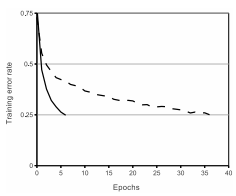

ReLU 함수는 tanh에 비해 학습이 빠르다. <br>
CIFAR-10 데이터셋의 학습결과 25% 훈련 오류에 도달하는 데 필요한 학습 속도는 ReLU가 tanh에 비해 약 6배 빠르다.

**빠른 학습은 큰 데이터셋을 학습하는 큰 모델의 성능에 중요한 영향을 미친다.**

**(2) Training on Multiple GPU**

과거에 사용했던 GPU의 크기는 매우 작았다. <br>
실제로 해당 논문에서 사용한 GPU는 'GTX 580 GPU'로 3GB의 메모리를 가진다. <br>
이러한 메모리 문제는 네트워크가 학습할 수 있는 최대 사이즈를 제한한다. <br>

그래서 해당 연구에서는 2개의 GPU를 이용해 학습을 진행했다. <br>
단, 각 GPU는 특정 계층에서만 통신한다. <br>
이때 2개의 GPU를 사용해 에러율을 줄일 수 있었다.

**(3) Local Response Normalization**

아래는 헤르만 격자(Hermann)라는 그림이다.

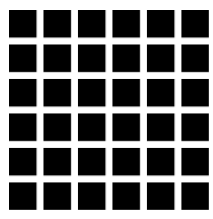

위 그림에서 흰색 선에 집중하지 않으면 회색 점이 보인다. <br>
이러한 현상을 **측면 억제(lateral inhibition)**이라고 부른다. <br>
신경생리학 정의로 **한 영역에 있는 신경 세포가 상호 간 연결되어 있을 때 한 중간신경세포를 통해 이웃에 있는 신경 세포를 억제하려는 경향이다.** <br>
즉, 강한 자극이 주변의 약한 자극을 전달하는 것을 막는 효과를 의미한다.

ReLU함수는 양수값을 받으면 그 값을 그대로 neuron에 전달한다. <br>
이때 너무 큰 값이 전달되어 주변의 낮은 값이 neuron에 전달되는 것을 막을 수 있다. <br>
즉, Conv, Pooling시 매우 높은 하나의 픽셀값이 주변의 픽셀에 영향을 미친다. <br>
이를 방지하기 위해 사용하는 것이 **Local Respose Normalization**이다. <br>
수식은 다음과 같다.

$b_{x, y}^i=a_{x, y}^i/(k+α∑_{j=max(0,i-n/2)}^{j=min(N-1, i+n/2)}(a_{x, y}^j)^2)^β$

* $b_{x, y}^i$: LRN한 Activation 결과
* $a_{x, y}^i$: Activation 결과
* $i$: 현재 Filter
* $n$: 고려해야 하는 Filter의 개수
* $N$: 총 Filter의 개수
* $k, α, β$: Hyperparameters

예를 들어 $n=3,\, i=5$라고 해보자.<br> 
n은 현재 i번째 Filtre 결과 값을 기준으로 Normalization 할 Filter의 개수다.<br>
따라서 Filter 1, 2, 3, 4, 5 값을 고려해 Normalization한 값을 Filter 3의 값으로 사용한다. <br>
이를 이용해 원래 Filter 5의 결과값이 엄청 크다해도 주변 값들을 고려해서 조금 더 줄여준다.

AlexNet은 이 방법을 통해 에러율을 낮출 수 있었다.

**(4) Overlapping Pooling**

이전까지는 Pooling에 사용하는 kernel의 크기가 z×z일 때 stride가 z와 같게 해서 **겹치는 부분이 없도록** Pooling을 진행했다. <br>
하지만 AlexNet에서는 stride를 z 미만으로 만들어 **커널이 겹치게 학습하도록** 진행한다. <br>
해당 방법으로 에러율과 Overfitting 가능성을 줄일 수 있다고 한다.

<h3> <strong> 2. Reducing Overfitting </strong> </h3>

**(1) Data Augementation**

해당 논문에서는 2가지 방법을 이용해 데이터를 증강했다.

첫 번째 방법은 **이미지 변환과 수평 반사(translation and horizontal reflection)**이다. <br>
256×256 이미지에서 무작위로 224×224 패치와 이들의 수평 반사를 추출해 학습에 사용했다. <br>
중앙, 좌측 상하단, 우측 상하단에서 crop을 진행해 5개의 이미지를 얻고 horizontal reflection을 통해 총 10개의 이미지를 추출했다. <br>
해당 이미지들을 이용해 예측을 수행하고 softmax layer로 예측값을 평균화한다.

두 번째 방법은 **훈련 이미지에서 RGB 채널의 강도를 변경하는 방법(PCA on RGB pixel valuesa)**이다. <br>
연구에서는 ImageNet 훈련 데이터 셋 전체에 RGB 픽셀 값 집합에 대한 PCA를 수행했다. <br>
PCA를 분석하면 eigenvector, eigenvalue를 찾을 수 있다. <br> 
이후 평균이 0, 표준 편차가 0.1인 가우시안 분포에서 얻은 랜덤 변수와 PCA의 결과를 곱해 각 이미지에 추가했다. <br>
이 방법으로 조명의 강도, 색상의 변화에 대해 불변하는 물체의 정체성을 나타내는 원본 이미지의 중요한 특징을 포착할 수 있다.

**(2) Drop out**

AlexNex에서는 마지막 두 개의 fully-connected layer에서 드롭아웃을 사용했다. <br>
드롭아웃이 없을 때는 과적합을 보이지만, 드롭아웃은 수렴에 필요한 반복 횟수를 대략 2배로 증가시켰다고 한다.


<h3> <strong> 3. Architecture </strong> </h3>

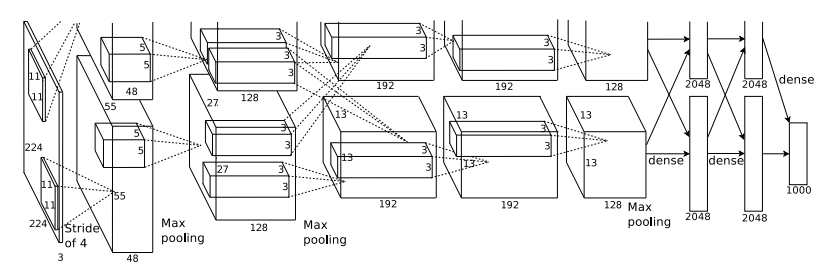